# Applied Data Science Capstone Project


## Car Accidents Severity

We'll start with importing the required libraries and some data exploration

In [1]:
import pandas as pd
import matplotlib as plt

In [12]:
df = pd.read_csv('Data-Collisions.csv', low_memory= False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

## Feature Selection & Preprocessing

A new data frame will be created that will contain a selection from the original accidents data frame featuring the necessary columns for predicting accident severity. Selection will based on the researchers judgment as a function of the provided data set summary.  

In [36]:
df= df[['SEVERITYCODE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER','ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING']]
df.head()

,SEVERITYCODE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,At Intersection (intersection related),N,0.0,Overcast,Wet,Daylight,NaN,NaN
1,1,Mid-Block (not related to intersection),N,0.0,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,1,Mid-Block (not related to intersection),N,0.0,Overcast,Dry,Daylight,NaN,NaN
3,1,Mid-Block (not related to intersection),N,0.0,Clear,Dry,Daylight,NaN,NaN
4,2,At Intersection (intersection related),N,0.0,Raining,Wet,Daylight,NaN,NaN


**Lets look at all unique values for every column in our featured data frame**

In [14]:
for col in df:
  print(col, df[col].unique())

SEVERITYCODE [2 1]
JUNCTIONTYPE ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction']
INATTENTIONIND [nan 'Y']
UNDERINFL ['N' '0' nan '1' 'Y']
WEATHER ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']
ROADCOND ['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
LIGHTCOND ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']
PEDROWNOTGRNT [nan 'Y']
SPEEDING [nan 'Y']


**Handling of missing data** 

In [16]:
# Evaluate missing data
missing_data = df.isnull().sum(skipna= False)
missing_data.head(5)


SEVERITYCODE           0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
dtype: int64

*Notice that 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING' seems to contain missing data as well*

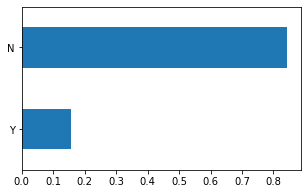

In [47]:
# Lets look at "INATTENTIONIND"
# As we have 164868 rows of missing data, it would be better not to drop rows with missing values. 
# Based on the attribute discreption provided in the data set summary we may replace nan by "N" so it would be "y" or "N"

import numpy as np
df["INATTENTIONIND"].replace(np.nan, "N", inplace=True)
df_JUNCTIONTYPE= df['INATTENTIONIND'].value_counts(normalize= True, ascending=True)
df_JUNCTIONTYPE.plot(kind='barh', figsize=(5,3))

['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' 'Unknown'
 'Ramp Junction']


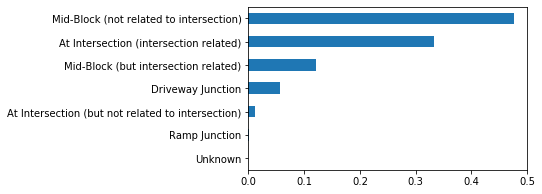

In [140]:
# Lets look at "JUNCTIONTYPE"

print(df['JUNCTIONTYPE'].unique())
df_JUNCTIONTYPE= df['JUNCTIONTYPE'].value_counts(normalize= True, ascending=True)
df_JUNCTIONTYPE.plot(kind='barh', figsize=(5,3))

In [ ]:
df_JUNCTIONTYPE= df[['JUNCTIONTYPE', 'SEVERITYCODE']]
df_JUNCTIONTYPE.plot(kind='bar', figsize=(5,3))

In [15]:
# Since Severity code is the target variable that we wish to predict,and it contains no missing values,
# We may be interseted in the distribution of levels 1&2 within the data set.

df['SEVERITYCODE'].value_counts(normalize=True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

[ 0. nan  1.]


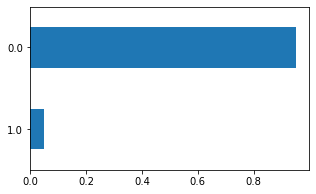

In [45]:
# lets look at "UNDERINFL"

print(df["UNDERINFL"].unique())
df_JUNCTIONTYPE= df["UNDERINFL"].value_counts(normalize= True, ascending=True)
df_JUNCTIONTYPE.plot(kind='barh', figsize=(5,3))

In [44]:
# Replace "N" & 'Y' with "0" & "1"
df["UNDERINFL"].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df["UNDERINFL"].replace(to_replace=['0','1'], value=[0,1],inplace=True)
print(df["UNDERINFL"].value_counts())
df_UNDERINFL= df["UNDERINFL"].value_counts(normalize= True, ascending=True)
df_UNDERINFL.plot(kind='barh', figsize=(5,3))

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

Clear                       109289
Raining                      32706
Overcast                     27238
Unknown                      11803
Snowing                        888
Other                          754
Fog/Smog/Smoke                 558
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


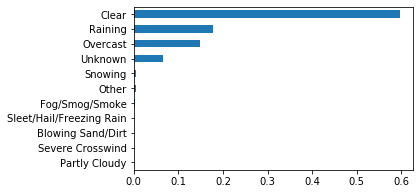

In [43]:
# lets look at "WEATHER"
print(df['WEATHER'].value_counts(normalize=False))
df_WEATHER= df["WEATHER"].value_counts(normalize= True, ascending=True)
df_WEATHER.plot(kind='barh', figsize=(5,3))

Dry               122467
Wet                46812
Unknown            11688
Ice                 1182
Snow/Slush           984
Other                123
Standing Water       109
Sand/Mud/Dirt         68
Oil                   60
Name: ROADCOND, dtype: int64


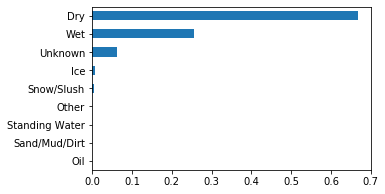

In [42]:
# lets look at "'ROADCOND"

print(df['ROADCOND'].value_counts(normalize=False))
df_ROADCOND= df["ROADCOND"].value_counts(normalize= True, ascending=True)
df_ROADCOND.plot(kind='barh', figsize=(5,3))

Daylight                    114030
Dark - Street Lights On      47657
Unknown                      10566
Dusk                          5794
Dawn                          2454
Dark - No Street Lights       1464
Dark - Street Lights Off      1164
Other                          211
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


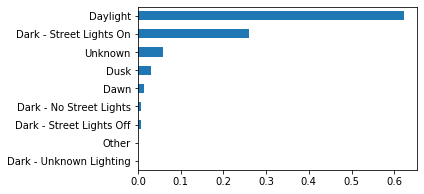

In [48]:
# lets look LIGHTCONDTCOND"LLIGHTCOND

print(df['LIGHTCOND'].value_counts(normalize=False))
df_LIGHTCOND= df["LIGHTCOND"].value_counts(normalize= True, ascending=True)
df_LIGHTCOND.plot(kind='barh', figsize=(5,3))

[nan 'Y']


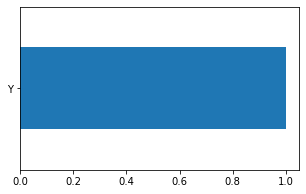

In [53]:
# lets look at "PEDROWNOTGRNT"

print(df['PEDROWNOTGRNT'].unique())
df_PEDROWNOTGRNT= df["PEDROWNOTGRNT"].value_counts(normalize= True, ascending=True)
df_PEDROWNOTGRNT.plot(kind='barh', figsize=(5,3))

N    183691
Y      4653
Name: PEDROWNOTGRNT, dtype: int64


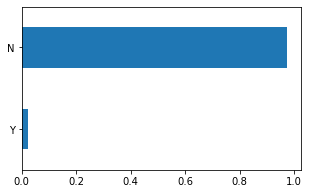

In [55]:
#Replace nan with 'N'

df["PEDROWNOTGRNT"].replace(np.nan, "N", inplace=True)
df_PEDROWNOTGRNT= df['PEDROWNOTGRNT'].value_counts(normalize= True, ascending=True)
df_PEDROWNOTGRNT.plot(kind='barh', figsize=(5,3))
print(df["PEDROWNOTGRNT"].value_counts())

[nan 'Y']


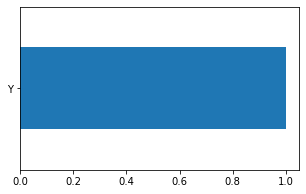

In [56]:
# lets look at "SPEEDING"

print(df['SPEEDING'].unique())
df_SPEEDING= df["SPEEDING"].value_counts(normalize= True, ascending=True)
df_SPEEDING.plot(kind='barh', figsize=(5,3))

N    179121
Y      9223
Name: SPEEDING, dtype: int64


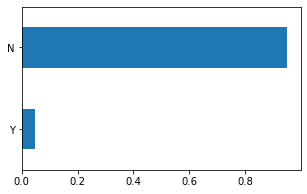

In [57]:
#Replace nan with 'N'

df["SPEEDING"].replace(np.nan, "N", inplace=True)
df_SPEEDING= df['SPEEDING'].value_counts(normalize= True, ascending=True)
df_SPEEDING.plot(kind='barh', figsize=(5,3))
print(df["SPEEDING"].value_counts())

### We will use one hot encoding technique to convert 7 predictor categorical variables to binary variables and append them to the feature Data Frame # 

In [78]:
Feature = df[['JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER','ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING']]
Feature.columns

Index(['JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING'],
      dtype='object')

In [82]:
Feature = pd.concat([Feature,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['INATTENTIONIND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['UNDERINFL'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['PEDROWNOTGRNT'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['SPEEDING'])], axis=1)

Feature.columns

Index([                                     'JUNCTIONTYPE',
                                          'INATTENTIONIND',
                                               'UNDERINFL',
                                                 'WEATHER',
                                                'ROADCOND',
                                               'LIGHTCOND',
                                           'PEDROWNOTGRNT',
                                                'SPEEDING',
       'At Intersection (but not related to intersection)',
                  'At Intersection (intersection related)',
                                       'Driveway Junction',
                    'Mid-Block (but intersection related)',
                 'Mid-Block (not related to intersection)',
                                           'Ramp Junction',
                                                 'Unknown',
                                                       'N',
                                        

In [83]:
Feature.drop(['JUNCTIONTYPE'], axis = 1,inplace=True)    
Feature.drop('INATTENTIONIND', axis=1, inplace=True)
Feature.drop('UNDERINFL', axis=1, inplace=True)
Feature.drop('WEATHER', axis=1, inplace=True)
Feature.drop('ROADCOND', axis=1, inplace=True)
Feature.drop('LIGHTCOND', axis=1, inplace=True)
Feature.drop('PEDROWNOTGRNT', axis=1, inplace=True)
Feature.drop('SPEEDING', axis=1, inplace=True)
Feature.columns

Index(['At Intersection (but not related to intersection)',
                  'At Intersection (intersection related)',
                                       'Driveway Junction',
                    'Mid-Block (but intersection related)',
                 'Mid-Block (not related to intersection)',
                                           'Ramp Junction',
                                                 'Unknown',
                                                       'N',
                                                       'Y',
                                                       0.0,
                                                       1.0,
                                       'Blowing Sand/Dirt',
                                                   'Clear',
                                          'Fog/Smog/Smoke',
                                                   'Other',
                                                'Overcast',
                                        

### Feature Selection ###

In [88]:
X = Feature
y = df['SEVERITYCODE'].values

## Data Preprocessing##

In [86]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)

C:\Users\M Salah\miniconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\M Salah\miniconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  


## Model Building ##
We will use the feature data set to build an accurate model then report the accuracy of each model to choose the best one. We will use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression


In [89]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
from sklearn import metrics

In [90]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62741246, 0.69391277, 0.6775598 , 0.69603653, 0.68825825,
       0.70198306, 0.66330404, 0.67724123, 0.64196023])

In [91]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7019830629960976 with k= 6


In [97]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

KNN Jaccard index: 0.64
KNN F1-score: 0.64


In [ ]:
# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
AccidentsTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
AccidentsTree.fit(X_train,y_train)
predTree = AccidentsTree.predict(X_test)

In [94]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [96]:
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, predTree))
print("DT F1-score: %.2f" % f1_score(y_test, predTree, average='weighted') )

DT Jaccard index: 0.71
DT F1-score: 0.61


In [ ]:
#Support Vector Machine

In [99]:
from sklearn import svm

In [102]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
yhatsv = clf.predict(X_test)

In [103]:
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhatsv))
print("SVM F1-score: %.2f" % f1_score(y_test, yhatsv, average='weighted') )

SVM Jaccard index: 0.71
SVM F1-score: 0.61


In [104]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhatlr = LR.predict(X_test)

In [105]:
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhatlr))
print("LR F1-score: %.2f" % f1_score(y_test, yhatlr, average='weighted') )

LR Jaccard index: 0.71
LR F1-score: 0.62


## Results##

In [138]:
d= {'Jaccard index':['0.64', '0.71', '0.71', '0.71'], 'F1-score': ['0.64', '0.61', '0.61', '0.62'] }
results= pd.DataFrame(d, index= ['KNN', 'DT', 'SVM', 'LR'])
results.convert_dtypes
results= results.astype(float)
results

,Jaccard index,F1-score
KNN,0.64,0.64
DT,0.71,0.61
SVM,0.71,0.61
LR,0.71,0.62


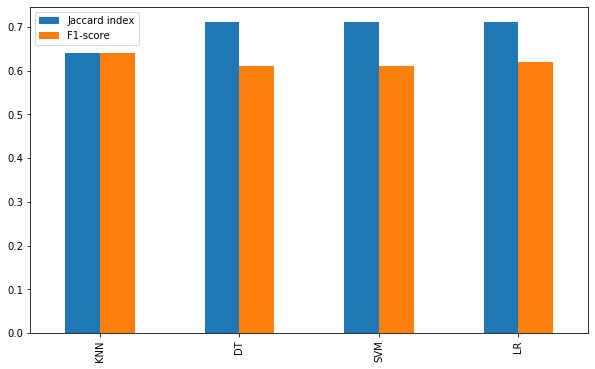

In [135]:
ax= results.plot(kind= 'bar', figsize= (10,6))

As it can be seen through the bar chart, KNN acurracy is the lowest among the 4 algorithms. So any of the remaining three; Decision Tree, Support Vector Machine and Logistic Regression can be applied to predict accidents severity and they should provide comparable performance. 